The socio demographic information included in the test set will be:

	"id_EXIST": a unique identifier for the meme.    
	"lang": the language of the meme (“en” or “es”).    
	"text": the text automatically extracted from the meme.
	"meme": the name of the file that contains the meme.
	"path_memes": the path to the file that contains the meme.
	"number_annotators": the number of persons that have annotated the meme.
	"annotators": a unique identifier for each of the annotators.
	"gender_annotators": the gender of the different annotators. Possible values are: “F” and “M”, for female and male respectively.
	"age_annotators": the age group of the different annotators. Possible values are: 18-22, 23-45, and 46+.
	"ethnicity_annotators": the self-reported ethnicity of the different annotators. Possible values are: “Black or African America”, “Hispano or Latino” , “White or Caucasian”, “Multiracial”, “Asian”, “Asian Indian” and “Middle Eastern”.
	"study_level_annotators": the self-reported level of study achieved by the different annotators. Possible values are: “Less than high school diploma”, “High school degree or equivalent”, “Bachelor’s degree”, “Master’s degree” and “Doctorate”.
	"country_annotators": the self-reported country where the different annotators live in.

# Importing and Installing libraries and modules

In [1]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=08b1c0a8777aa17678861377bd19832ac6b64bf14e6d9e4b0226162abe8f7bb7
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling ch

In [2]:
from google.colab import drive
import json
import pprint
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from googletrans import Translator

In [3]:
# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read the JSON files from Google drive

In [ ]:
dev_file_path = '/content/drive/My Drive/EXIST 2024 Tweets Dataset/dev/EXIST2024_dev.json'
train_file_path = '/content/drive/My Drive/EXIST 2024 Tweets Dataset/training/EXIST2024_training.json'

# Read the JSON file
with open(dev_file_path, 'r') as json_file:
  dev_data = json.load(json_file)

# Read the JSON file
with open(train_file_path, 'r') as json_file:
  train_data = json.load(json_file)

## Convert JSON file to CSV

In [ ]:
# Open a CSV file for writing
with open('EXIT2024_train.csv', 'w', newline='') as file:
  train_csv_writer = csv.writer(file)

  # Write the header row
  headers = ['id', 'lang', 'tweet', 'number_annotators', 'annotators', 'gender_annotators', 'age_annotators',
            'ethnicities_annotators', 'study_levels_annotators', 'countries_annotators',
            'labels_task1', 'labels_task2', 'labels_task3', 'split']
  train_csv_writer.writerow(headers)

  # Write the data rows
  for key, value in train_data.items():
    row = [
    key,
    value['lang'],
    value['tweet'],
    value['number_annotators'],
    ';'.join(value['annotators']),
    ';'.join(value['gender_annotators']),
    ';'.join(value['age_annotators']),
    ';'.join(value['ethnicities_annotators']),
    ';'.join(value['study_levels_annotators']),
    ';'.join(value['countries_annotators']),
    ';'.join(value['labels_task1']),
    ';'.join(value['labels_task2']),
    ';'.join(['|'.join(labels) for labels in value['labels_task3']]),
    value['split']
    ]
    train_csv_writer.writerow(row)

In [ ]:
# Open a CSV file for writing
with open('EXIT2024_dev.csv', 'w', newline='') as file:
  dev_csv_writer = csv.writer(file)

  # Write the header row
  headers = ['id', 'lang', 'tweet', 'number_annotators', 'annotators', 'gender_annotators', 'age_annotators',
            'ethnicities_annotators', 'study_levels_annotators', 'countries_annotators',
            'labels_task1', 'labels_task2', 'labels_task3', 'split']
  dev_csv_writer.writerow(headers)

  # Write the data rows
  for key, value in dev_data.items():
    row = [
    key,
    value['lang'],
    value['tweet'],
    value['number_annotators'],
    ';'.join(value['annotators']),
    ';'.join(value['gender_annotators']),
    ';'.join(value['age_annotators']),
    ';'.join(value['ethnicities_annotators']),
    ';'.join(value['study_levels_annotators']),
    ';'.join(value['countries_annotators']),
    ';'.join(value['labels_task1']),
    ';'.join(value['labels_task2']),
    ';'.join(['|'.join(labels) for labels in value['labels_task3']]),
    value['split']
    ]
    dev_csv_writer.writerow(row)

# Read CSV files from Google Drive

## Original files

In [4]:
# Convert the dataframes for csv files
dev_csv_file_path = '/content/drive/My Drive/EXIST 2024 Tweets Dataset/csv files/EXIT2024_dev.csv'
train_csv_file_path = '/content/drive/My Drive/EXIST 2024 Tweets Dataset/csv files/EXIT2024_train.csv'

train_df = pd.read_csv(train_csv_file_path)
dev_df = pd.read_csv(dev_csv_file_path)

## Translated files

In [11]:
# Convert the dataframes for csv files
dev_all_es_path = '/content/drive/My Drive/EXIST 2024 Tweets Dataset/csv files/dev_all_es.csv'
dev_all_en_path = '/content/drive/My Drive/EXIST 2024 Tweets Dataset/csv files/dev_all_en.csv'
train_all_es_path = '/content/drive/My Drive/EXIST 2024 Tweets Dataset/csv files/train_all_es.csv'
train_all_en_path = '/content/drive/My Drive/EXIST 2024 Tweets Dataset/csv files/train_all_en.csv'

dev_all_es = pd.read_csv(dev_all_es_path)
dev_all_en = pd.read_csv(dev_all_en_path)
train_all_es = pd.read_csv(train_all_es_path)
train_all_en = pd.read_csv(train_all_en_path)

# Analyse train dataframe

In [4]:
train_df.head()

,id,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,ethnicities_annotators,study_levels_annotators,countries_annotators,labels_task1,labels_task2,labels_task3,split
0,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",6,Annotator_1;Annotator_2;Annotator_3;Annotator_...,F;F;F;M;M;M,18-22;23-45;46+;46+;23-45;18-22,White or Caucasian;Hispano or Latino;White or ...,Bachelor’s degree;Bachelor’s degree;High schoo...,Italy;Mexico;United States;Spain;Spain;Chile,YES;YES;NO;YES;YES;YES,REPORTED;JUDGEMENTAL;-;REPORTED;JUDGEMENTAL;RE...,OBJECTIFICATION;OBJECTIFICATION|SEXUAL-VIOLENC...,TRAIN_ES
1,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,6,Annotator_7;Annotator_8;Annotator_9;Annotator_...,F;F;F;M;M;M,18-22;23-45;46+;46+;23-45;18-22,Black or African American;Hispano or Latino;Wh...,High school degree or equivalent;Bachelor’s de...,United Kingdom;Mexico;United States;Portugal;C...,NO;NO;NO;NO;YES;NO,-;-;-;-;DIRECT;-,-;-;-;-;OBJECTIFICATION;-,TRAIN_ES
2,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha...",6,Annotator_7;Annotator_8;Annotator_9;Annotator_...,F;F;F;M;M;M,18-22;23-45;46+;46+;23-45;18-22,Black or African American;Hispano or Latino;Wh...,High school degree or equivalent;Bachelor’s de...,United Kingdom;Mexico;United States;Portugal;C...,NO;NO;NO;NO;NO;NO,-;-;-;-;-;-,-;-;-;-;-;-,TRAIN_ES
3,100004,es,@Lunariita7 Un retraso social bastante lamenta...,6,Annotator_13;Annotator_14;Annotator_15;Annotat...,F;F;F;M;M;M,18-22;23-45;46+;46+;23-45;18-22,Hispano or Latino;Hispano or Latino;White or C...,High school degree or equivalent;Bachelor’s de...,Mexico;Chile;Spain;Spain;Portugal;Spain,NO;NO;YES;NO;YES;YES,-;-;DIRECT;-;REPORTED;REPORTED,-;-;IDEOLOGICAL-INEQUALITY;-;IDEOLOGICAL-INEQU...,TRAIN_ES
4,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,6,Annotator_19;Annotator_20;Annotator_21;Annotat...,F;F;F;M;M;M,18-22;23-45;46+;46+;23-45;18-22,Hispano or Latino;Hispano or Latino;White or C...,Bachelor’s degree;Bachelor’s degree;Master’s d...,Mexico;Afghanistan;United States;Italy;Portuga...,YES;NO;YES;NO;YES;YES,REPORTED;-;JUDGEMENTAL;-;JUDGEMENTAL;DIRECT,STEREOTYPING-DOMINANCE|OBJECTIFICATION;-;IDEOL...,TRAIN_ES


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6920 entries, 0 to 6919
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       6920 non-null   int64 
 1   lang                     6920 non-null   object
 2   tweet                    6920 non-null   object
 3   number_annotators        6920 non-null   int64 
 4   annotators               6920 non-null   object
 5   gender_annotators        6920 non-null   object
 6   age_annotators           6920 non-null   object
 7   ethnicities_annotators   6920 non-null   object
 8   study_levels_annotators  6920 non-null   object
 9   countries_annotators     6920 non-null   object
 10  labels_task1             6920 non-null   object
 11  labels_task2             6920 non-null   object
 12  labels_task3             6920 non-null   object
 13  split                    6920 non-null   object
dtypes: int64(2), object(12)
memory usage: 75

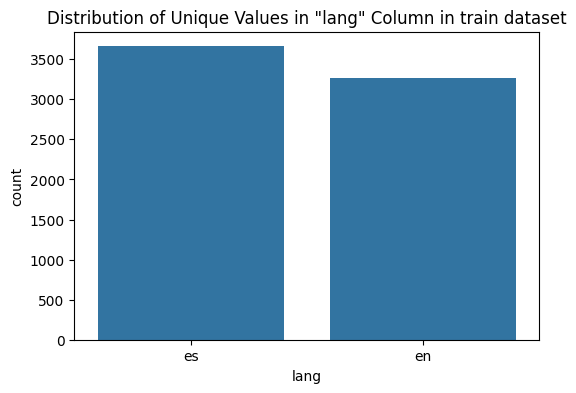

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='lang', data=train_df)
plt.title('Distribution of Unique Values in "lang" Column in train dataset')
plt.show()


## Translation

In [5]:
# Create a Translator object
translator = Translator()

# Define a function to translate text
def translate_text(row):
    if row['lang'] == 'es':
        return translator.translate(row['tweet'], src='es', dest='en').text
    else:
        return translator.translate(row['tweet'], src='en', dest='es').text

# Create a new dataframe where Spanish texts are translated to English
train_df_en = train_df.copy()
train_df_en.loc[train_df_en['lang'] == 'es', 'tweet'] = train_df_en.loc[train_df_en['lang'] == 'es'].apply(translate_text, axis=1)

# Create a new dataframe where English texts are translated to Spanish
train_df_es = train_df.copy()
train_df_es.loc[train_df_es['lang'] == 'en', 'tweet'] = train_df_es.loc[train_df_es['lang'] == 'en'].apply(translate_text, axis=1)

# Print the new dataframes
print("Dataframe with Spanish tweets translated to English:")
print(train_df_en)
print("\\nDataframe with English tweets translated to Spanish:")
print(train_df_es)

Dataframe with Spanish tweets translated to English:
          id lang                                              tweet  \
0     100001   es  @TheChiflis Ignore the other one, he's an assh...   
1     100002   es  @ultimonomada_ If comicsgate is anything like ...   
2     100003   es  @Steven2897 Read about Gamergate, and how it h...   
3     100004   es  @Lunariita7 A quite unfortunate social delay, ...   
4     100005   es  @novadragon21 @icep4ck @TvDannyZ So since this...   
...      ...  ...                                                ...   
6915  203256   en  idk why y’all bitches think having half your a...   
6916  203257   en  This has been a part of an experiment with @Wo...   
6917  203258   en  "Take me already" "Not yet. You gotta be ready...   
6918  203259   en  @clintneedcoffee why do you look like a whore?...   
6919  203260   en  ik when mandy says “you look like a whore” i l...   

      number_annotators                                         annotators  \
0   

In [6]:
train_df_en.to_csv("train_all_en.csv", index=False)
train_df_es.to_csv("train_all_es.csv", index=False)

## Task 1

In [ ]:
# For the first task (The below steps must be done on dev and train data separately)
# What values exist except YES, NO
# Distribution of data (5 Yes, 5 No, 4 Yes | 1 No, etc)
# Perform majority vote on the data (more than or equal 3 Yes would be Yes)
# Then again calculate and plot the distribution of data (# Yes, # No)

In [ ]:
train_df_split_t1 = train_df['labels_task1'].str.split(';', expand=True)
# print(train_df_split_t1.head())
train_df_counts_t1 = train_df_split_t1.apply(lambda x: x.value_counts(), axis=1)
# print(train_df_counts_t1)
train_df_counts_t1 = train_df_counts_t1.fillna(0)
train_df_counts_t1_final = train_df_counts_t1.groupby(['YES', 'NO']).size().reset_index(name='counts')
print(train_df_counts_t1_final)

   YES   NO  counts
0  0.0  6.0    1434
1  1.0  5.0    1071
2  2.0  4.0     862
3  3.0  3.0     856
4  4.0  2.0     910
5  5.0  1.0     972
6  6.0  0.0     815


In [ ]:
train_df_counts_t1_final['combination'] = train_df_counts_t1_final['YES'].astype(str) + ' YES, ' + train_df_counts_t1_final['NO'].astype(str) + ' NO'

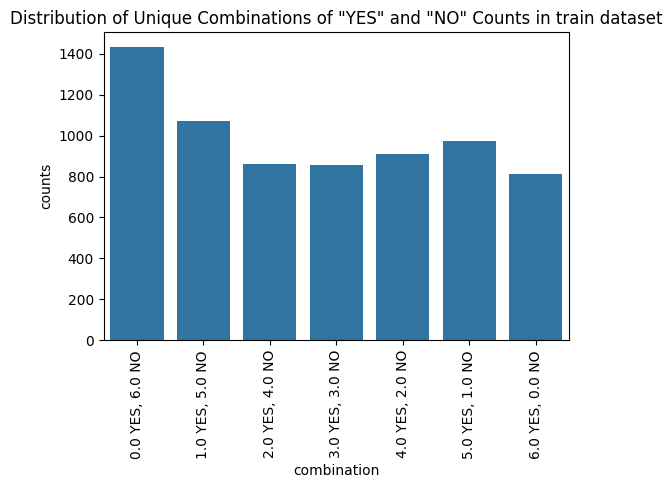

In [ ]:

plt.figure(figsize=(6,4))
sns.barplot(x='combination', y='counts', data=train_df_counts_t1_final)
plt.title('Distribution of Unique Combinations of "YES" and "NO" Counts in train dataset')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [12]:
# Define a function to count 'YES' and 'NO' in a label
def count_yes_no(label):
    yes_count = label.count('YES')
    no_count = label.count('NO')
    return yes_count == no_count

In [14]:
train_df_t1 = train_df[['id', 'lang', 'tweet', 'labels_task1']].copy()
train_df_t1_es = train_all_es[['id', 'lang', 'tweet', 'labels_task1']].copy()
train_df_t1_en = train_all_en[['id', 'lang', 'tweet', 'labels_task1']].copy()

# Apply the function to 'labels' column and get a boolean Series
mask = train_df_t1['labels_task1'].apply(count_yes_no)

# Invert the mask and select rows where the number of 'YES' is not equal to 'NO'
train_df_t1 = train_df_t1[~mask]
train_df_t1_es = train_df_t1_es[~mask]
train_df_t1_en = train_df_t1_en[~mask]

### For dev

In [39]:
dev_df_t1 = dev_df[['id', 'lang', 'tweet', 'labels_task1']].copy()
dev_df_t1_es = dev_all_es[['id', 'lang', 'tweet', 'labels_task1']].copy()
dev_df_t1_en = dev_all_en[['id', 'lang', 'tweet', 'labels_task1']].copy()

# Apply the function to 'labels' column and get a boolean Series
mask = dev_df_t1['labels_task1'].apply(count_yes_no)

# Invert the mask and select rows where the number of 'YES' is not equal to 'NO'
dev_df_t1 = dev_df_t1[~mask]
dev_df_t1_es = dev_df_t1_es[~mask]
dev_df_t1_en = dev_df_t1_en[~mask]

In [22]:
def check_yes_no_combination(df):
  df_split_t1 = df['labels_task1'].str.split(';', expand=True)
  df_counts_t1 = df_split_t1.apply(lambda x: x.value_counts(), axis=1)
  df_counts_t1 = df_counts_t1.fillna(0)
  df_counts_t1_final = df_counts_t1.groupby(['YES', 'NO']).size().reset_index(name='counts')
  return df_counts_t1_final

In [24]:
train_all_counts = check_yes_no_combination(train_df_t1_en)
print(f"YES and NO combination for all the training data:\n {train_all_counts}")
train_es_counts = check_yes_no_combination(train_df_t1_es)
print(f"YES and NO combination for Spanish the training data:\n {train_es_counts}")
train_en_counts = check_yes_no_combination(train_df_t1_en)
print(f"YES and NO combination for English the training data:\n {train_en_counts}")

YES and NO combination for all the training data:
    YES   NO  counts
0  0.0  6.0    1434
1  1.0  5.0    1071
2  2.0  4.0     862
3  4.0  2.0     910
4  5.0  1.0     972
5  6.0  0.0     815
YES and NO combination for Spanish the training data:
    YES   NO  counts
0  0.0  6.0    1434
1  1.0  5.0    1071
2  2.0  4.0     862
3  4.0  2.0     910
4  5.0  1.0     972
5  6.0  0.0     815
YES and NO combination for English the training data:
    YES   NO  counts
0  0.0  6.0    1434
1  1.0  5.0    1071
2  2.0  4.0     862
3  4.0  2.0     910
4  5.0  1.0     972
5  6.0  0.0     815


### For dev

In [40]:
dev_all_counts = check_yes_no_combination(dev_df_t1_en)
print(f"YES and NO combination for all the dev data:\n {dev_all_counts}")
dev_es_counts = check_yes_no_combination(dev_df_t1_es)
print(f"YES and NO combination for Spanish the dev data:\n {dev_es_counts}")
dev_en_counts = check_yes_no_combination(dev_df_t1_en)
print(f"YES and NO combination for English the dev data:\n {dev_en_counts}")

YES and NO combination for all the dev data:
    YES   NO  counts
0  0.0  6.0     203
1  1.0  5.0     160
2  2.0  4.0     116
3  4.0  2.0     144
4  5.0  1.0     148
5  6.0  0.0     163
YES and NO combination for Spanish the dev data:
    YES   NO  counts
0  0.0  6.0     203
1  1.0  5.0     160
2  2.0  4.0     116
3  4.0  2.0     144
4  5.0  1.0     148
5  6.0  0.0     163
YES and NO combination for English the dev data:
    YES   NO  counts
0  0.0  6.0     203
1  1.0  5.0     160
2  2.0  4.0     116
3  4.0  2.0     144
4  5.0  1.0     148
5  6.0  0.0     163


In [25]:
def calculate_labels(label):
    # Count the number of 'YES' and 'NO'
    yes_count = label.count('YES')
    no_count = label.count('NO')

    # Calculate the total number of votes
    total_votes = yes_count + no_count

    # Calculate the hard label
    hard_label = 'YES' if yes_count > no_count else 'NO'

    # Calculate the soft label
    soft_label = {
        'YES': yes_count / total_votes,
        'NO': no_count / total_votes
    }

    return hard_label, soft_label

In [26]:
# Apply the function to 'labels' column and get the hard and soft labels
train_df_t1['hard_label'], train_df_t1['soft_label'] = zip(*train_df_t1['labels_task1'].apply(calculate_labels))
train_df_t1_es['hard_label'], train_df_t1_es['soft_label'] = zip(*train_df_t1['labels_task1'].apply(calculate_labels))
train_df_t1_en['hard_label'], train_df_t1_en['soft_label'] = zip(*train_df_t1['labels_task1'].apply(calculate_labels))

In [28]:
train_df_t1.head()

,id,lang,tweet,labels_task1,hard_label,soft_label
0,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",YES;YES;NO;YES;YES;YES,YES,"{'YES': 0.8333333333333334, 'NO': 0.1666666666..."
1,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,NO;NO;NO;NO;YES;NO,NO,"{'YES': 0.16666666666666666, 'NO': 0.833333333..."
2,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha...",NO;NO;NO;NO;NO;NO,NO,"{'YES': 0.0, 'NO': 1.0}"
4,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,YES;NO;YES;NO;YES;YES,YES,"{'YES': 0.6666666666666666, 'NO': 0.3333333333..."
5,100006,es,@yonkykong Aaah sí. Andrew Dobson. El que se d...,NO;NO;NO;NO;NO;NO,NO,"{'YES': 0.0, 'NO': 1.0}"


In [30]:
train_df_t1_es.head()

,id,lang,tweet,labels_task1,hard_label,soft_label
0,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",YES;YES;NO;YES;YES;YES,YES,"{'YES': 0.8333333333333334, 'NO': 0.1666666666..."
1,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,NO;NO;NO;NO;YES;NO,NO,"{'YES': 0.16666666666666666, 'NO': 0.833333333..."
2,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha...",NO;NO;NO;NO;NO;NO,NO,"{'YES': 0.0, 'NO': 1.0}"
4,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,YES;NO;YES;NO;YES;YES,YES,"{'YES': 0.6666666666666666, 'NO': 0.3333333333..."
5,100006,es,@yonkykong Aaah sí. Andrew Dobson. El que se d...,NO;NO;NO;NO;NO;NO,NO,"{'YES': 0.0, 'NO': 1.0}"


In [31]:
train_df_t1_en.head()

,id,lang,tweet,labels_task1,hard_label,soft_label
0,100001,es,"@TheChiflis Ignore the other one, he's an assh...",YES;YES;NO;YES;YES;YES,YES,"{'YES': 0.8333333333333334, 'NO': 0.1666666666..."
1,100002,es,@ultimonomada_ If comicsgate is anything like ...,NO;NO;NO;NO;YES;NO,NO,"{'YES': 0.16666666666666666, 'NO': 0.833333333..."
2,100003,es,"@Steven2897 Read about Gamergate, and how it h...",NO;NO;NO;NO;NO;NO,NO,"{'YES': 0.0, 'NO': 1.0}"
4,100005,es,@novadragon21 @icep4ck @TvDannyZ So since this...,YES;NO;YES;NO;YES;YES,YES,"{'YES': 0.6666666666666666, 'NO': 0.3333333333..."
5,100006,es,@yonkykong Aaah yes. Andrew Dobson. The one wh...,NO;NO;NO;NO;NO;NO,NO,"{'YES': 0.0, 'NO': 1.0}"


### For dev

In [41]:
# Apply the function to 'labels' column and get the hard and soft labels
dev_df_t1['hard_label'], dev_df_t1['soft_label'] = zip(*dev_df_t1['labels_task1'].apply(calculate_labels))
dev_df_t1_es['hard_label'], dev_df_t1_es['soft_label'] = zip(*dev_df_t1['labels_task1'].apply(calculate_labels))
dev_df_t1_en['hard_label'], dev_df_t1_en['soft_label'] = zip(*dev_df_t1['labels_task1'].apply(calculate_labels))

In [32]:
def simple_preprocess(text):
  """
  pass the tweet data as a series. do not use apply function
  only preprocesses for replacing @USER and URLS
  """
  # print("i am preprocessing")
  URL_RE = re.compile(r"https?:\/\/[\w\.\/\?\=\d&#%_:/-]+")
  HANDLE_RE = re.compile(r"@\w+")
  tweets = []
  for t in text:
    t = HANDLE_RE.sub("@USER", t)
    t = URL_RE.sub("HTTPURL", t)
    tweets.append(t)
  return tweets

In [33]:
train_df_t1["tweet"] = simple_preprocess(train_df_t1["tweet"])
train_df_t1_en["tweet"] = simple_preprocess(train_df_t1_en["tweet"])
train_df_t1_es["tweet"] = simple_preprocess(train_df_t1_es["tweet"])

In [34]:
train_df_t1.head()

,id,lang,tweet,labels_task1,hard_label,soft_label
0,100001,es,"@USER Ignora al otro, es un capullo.El problem...",YES;YES;NO;YES;YES;YES,YES,"{'YES': 0.8333333333333334, 'NO': 0.1666666666..."
1,100002,es,@USER Si comicsgate se parece en algo a gamerg...,NO;NO;NO;NO;YES;NO,NO,"{'YES': 0.16666666666666666, 'NO': 0.833333333..."
2,100003,es,"@USER Lee sobre Gamergate, y como eso ha cambi...",NO;NO;NO;NO;NO;NO,NO,"{'YES': 0.0, 'NO': 1.0}"
4,100005,es,@USER @USER @USER Entonces como así es el merc...,YES;NO;YES;NO;YES;YES,YES,"{'YES': 0.6666666666666666, 'NO': 0.3333333333..."
5,100006,es,@USER Aaah sí. Andrew Dobson. El que se dedicó...,NO;NO;NO;NO;NO;NO,NO,"{'YES': 0.0, 'NO': 1.0}"


In [35]:
train_df_t1_en.head()

,id,lang,tweet,labels_task1,hard_label,soft_label
0,100001,es,"@USER Ignore the other one, he's an asshole. T...",YES;YES;NO;YES;YES;YES,YES,"{'YES': 0.8333333333333334, 'NO': 0.1666666666..."
1,100002,es,@USER If comicsgate is anything like gamergate...,NO;NO;NO;NO;YES;NO,NO,"{'YES': 0.16666666666666666, 'NO': 0.833333333..."
2,100003,es,"@USER Read about Gamergate, and how it has cha...",NO;NO;NO;NO;NO;NO,NO,"{'YES': 0.0, 'NO': 1.0}"
4,100005,es,"@USER @USER @USER So since this is the market,...",YES;NO;YES;NO;YES;YES,YES,"{'YES': 0.6666666666666666, 'NO': 0.3333333333..."
5,100006,es,@USER Aaah yes. Andrew Dobson. The one who ded...,NO;NO;NO;NO;NO;NO,NO,"{'YES': 0.0, 'NO': 1.0}"


In [36]:
train_df_t1_es.head()

,id,lang,tweet,labels_task1,hard_label,soft_label
0,100001,es,"@USER Ignora al otro, es un capullo.El problem...",YES;YES;NO;YES;YES;YES,YES,"{'YES': 0.8333333333333334, 'NO': 0.1666666666..."
1,100002,es,@USER Si comicsgate se parece en algo a gamerg...,NO;NO;NO;NO;YES;NO,NO,"{'YES': 0.16666666666666666, 'NO': 0.833333333..."
2,100003,es,"@USER Lee sobre Gamergate, y como eso ha cambi...",NO;NO;NO;NO;NO;NO,NO,"{'YES': 0.0, 'NO': 1.0}"
4,100005,es,@USER @USER @USER Entonces como así es el merc...,YES;NO;YES;NO;YES;YES,YES,"{'YES': 0.6666666666666666, 'NO': 0.3333333333..."
5,100006,es,@USER Aaah sí. Andrew Dobson. El que se dedicó...,NO;NO;NO;NO;NO;NO,NO,"{'YES': 0.0, 'NO': 1.0}"


### For dev

In [42]:
dev_df_t1["tweet"] = simple_preprocess(dev_df_t1["tweet"])
dev_df_t1_en["tweet"] = simple_preprocess(dev_df_t1_en["tweet"])
dev_df_t1_es["tweet"] = simple_preprocess(dev_df_t1_es["tweet"])

In [38]:
train_df_t1.to_csv("train_all_v2.csv", index=False)
train_df_t1_es.to_csv("train_es_v2.csv", index=False)
train_df_t1_en.to_csv("train_en_v2.csv", index=False)

### For dev

In [43]:
dev_df_t1.to_csv("dev_all_t1_v2.csv", index=False)
dev_df_t1_es.to_csv("dev_es_t1_v2.csv", index=False)
dev_df_t1_en.to_csv("dev_en_t1_v2.csv", index=False)

## Task 2 (Ignored just for now...)

In [ ]:
# For the second task
train_df_split_t2 = train_df['labels_task2'].str.split(';', expand=True)
train_df_counts_t2 = train_df_split_t2.apply(lambda x: x.value_counts(), axis=1)
train_df_counts_t2 = train_df_counts_t2.fillna(0)
print(train_df_counts_t2)

        -  DIRECT  JUDGEMENTAL  REPORTED  UNKNOWN
0     1.0     0.0          2.0       3.0      0.0
1     5.0     1.0          0.0       0.0      0.0
2     6.0     0.0          0.0       0.0      0.0
3     3.0     1.0          0.0       2.0      0.0
4     2.0     1.0          2.0       1.0      0.0
...   ...     ...          ...       ...      ...
6915  0.0     4.0          2.0       0.0      0.0
6916  0.0     1.0          4.0       1.0      0.0
6917  2.0     3.0          1.0       0.0      0.0
6918  0.0     5.0          1.0       0.0      0.0
6919  1.0     2.0          1.0       2.0      0.0

[6920 rows x 5 columns]


In [ ]:
train_df_counts_t2['majority_vote'] = train_df_counts_t2.idxmax(axis=1)
print(train_df_counts_t2)

        -  DIRECT  JUDGEMENTAL  REPORTED  UNKNOWN majority_vote
0     1.0     0.0          2.0       3.0      0.0      REPORTED
1     5.0     1.0          0.0       0.0      0.0             -
2     6.0     0.0          0.0       0.0      0.0             -
3     3.0     1.0          0.0       2.0      0.0             -
4     2.0     1.0          2.0       1.0      0.0             -
...   ...     ...          ...       ...      ...           ...
6915  0.0     4.0          2.0       0.0      0.0        DIRECT
6916  0.0     1.0          4.0       1.0      0.0   JUDGEMENTAL
6917  2.0     3.0          1.0       0.0      0.0        DIRECT
6918  0.0     5.0          1.0       0.0      0.0        DIRECT
6919  1.0     2.0          1.0       2.0      0.0        DIRECT

[6920 rows x 6 columns]


In [ ]:
def check_tie(row):
    row = row.dropna()
    max_count = row.max()
    max_count_labels = row[row == max_count]
    if len(max_count_labels) > 1:
        return 'TIE'
    else:
        return max_count_labels.idxmax()

train_df_counts_t2['majority_vote'] = train_df_counts_t2.apply(check_tie, axis=1)

print(train_df_counts_t2)

        -  DIRECT  JUDGEMENTAL  REPORTED  UNKNOWN majority_vote
0     1.0     0.0          2.0       3.0      0.0      REPORTED
1     5.0     1.0          0.0       0.0      0.0             -
2     6.0     0.0          0.0       0.0      0.0             -
3     3.0     1.0          0.0       2.0      0.0             -
4     2.0     1.0          2.0       1.0      0.0           TIE
...   ...     ...          ...       ...      ...           ...
6915  0.0     4.0          2.0       0.0      0.0        DIRECT
6916  0.0     1.0          4.0       1.0      0.0   JUDGEMENTAL
6917  2.0     3.0          1.0       0.0      0.0        DIRECT
6918  0.0     5.0          1.0       0.0      0.0        DIRECT
6919  1.0     2.0          1.0       2.0      0.0           TIE

[6920 rows x 6 columns]


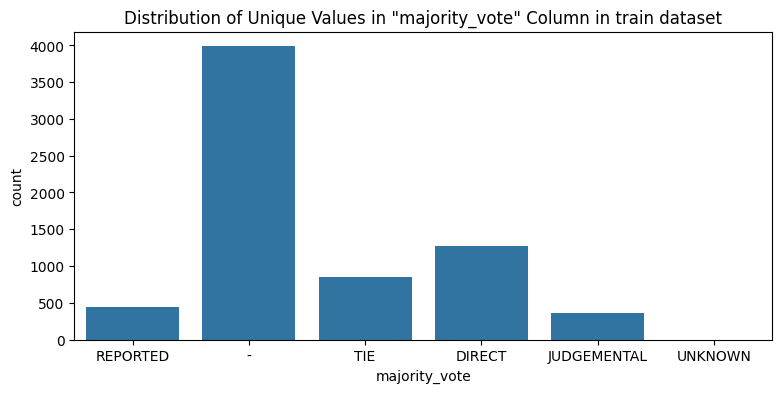

In [ ]:
plt.figure(figsize=(9,4))
sns.countplot(x='majority_vote', data=train_df_counts_t2)
plt.title('Distribution of Unique Values in "majority_vote" Column in train dataset')
plt.show()

## Task 3

In [44]:
# For the third task
train_df_split_t3 = train_df['labels_task3'].str.split(';', expand=True)
train_df_counts_t3 = train_df_split_t3.apply(lambda x: x.str.split('|').explode().value_counts(), axis=1)
train_df_counts_t3 = train_df_counts_t3.fillna(0)
# OBJECTIFICATION;OBJECTIFICATION|SEXUAL-VIOLENCE;-;STEREOTYPING-DOMINANCE;SEXUAL-VIOLENCE;IDEOLOGICAL-INEQUALITY|MISOGYNY-NON-SEXUAL-VIOLENCE

In [46]:
train_df_counts_t3

,-,IDEOLOGICAL-INEQUALITY,MISOGYNY-NON-SEXUAL-VIOLENCE,OBJECTIFICATION,SEXUAL-VIOLENCE,STEREOTYPING-DOMINANCE,UNKNOWN
0,1.0,1.0,1.0,2.0,2.0,1.0,0.0
1,5.0,0.0,0.0,1.0,0.0,0.0,0.0
2,6.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,3.0,0.0,1.0,1.0,0.0,0.0
4,2.0,2.0,0.0,3.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...
6915,0.0,1.0,3.0,4.0,4.0,3.0,0.0
6916,0.0,0.0,1.0,4.0,0.0,1.0,0.0
6917,2.0,0.0,0.0,1.0,2.0,1.0,0.0
6918,0.0,1.0,3.0,4.0,3.0,2.0,0.0


In [47]:
# Define a function to count the number of each label
def count_labels(label):
    # Split the labels by ';' and '|'
    labels = label.replace(';', '|').split('|')

    # Count the number of each label
    label_counts = {label: labels.count(label) for label in set(labels) if label != '-'}

    return label_counts

In [48]:
# Copy the dataframe and select only 'text' and 'multi_label' columns
train_df_t3_copy = train_df[['id', 'lang', 'tweet', 'labels_task3']].copy()

# Apply the function to 'multi_label' column and get the label counts
train_df_t3_copy['label_counts'] = train_df_t3_copy['labels_task3'].apply(count_labels)

# Get the unique labels
unique_labels = set(label for label_counts in train_df_t3_copy['label_counts'] for label in label_counts.keys())

# Add a column for each unique label and save the number of annotators who have given this label
for label in unique_labels:
    train_df_t3_copy[label] = train_df_t3_copy['label_counts'].apply(lambda x: x.get(label, 0))

In [49]:
train_df_t3_copy.head()

,id,lang,tweet,labels_task3,label_counts,STEREOTYPING-DOMINANCE,MISOGYNY-NON-SEXUAL-VIOLENCE,OBJECTIFICATION,UNKNOWN,IDEOLOGICAL-INEQUALITY,SEXUAL-VIOLENCE
0,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",OBJECTIFICATION;OBJECTIFICATION|SEXUAL-VIOLENC...,"{'STEREOTYPING-DOMINANCE': 1, 'MISOGYNY-NON-SE...",1,1,2,0,1,2
1,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,-;-;-;-;OBJECTIFICATION;-,{'OBJECTIFICATION': 1},0,0,1,0,0,0
2,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha...",-;-;-;-;-;-,{},0,0,0,0,0,0
3,100004,es,@Lunariita7 Un retraso social bastante lamenta...,-;-;IDEOLOGICAL-INEQUALITY;-;IDEOLOGICAL-INEQU...,"{'OBJECTIFICATION': 1, 'IDEOLOGICAL-INEQUALITY...",0,0,1,0,3,1
4,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,STEREOTYPING-DOMINANCE|OBJECTIFICATION;-;IDEOL...,"{'STEREOTYPING-DOMINANCE': 3, 'IDEOLOGICAL-INE...",3,0,3,0,2,0


In [50]:
# Define a function to calculate hard and soft labels
def calculate_multi_labels(row):
    labels = row['labels_task3'].split(';')
    # Flatten the list of lists and remove 'Unknown' and '-' labels
    labels = [label for sublist in labels for label in sublist.split('|') if label not in ['-', 'Unknown']]
    # Calculate hard labels
    hard_labels = list(set(labels))
    # Calculate soft labels
    soft_labels = {label: labels.count(label) / len(labels) for label in hard_labels}
    # Assign 'No' if no labels are predicted
    if not hard_labels:
        hard_labels = ['No']
        soft_labels = {'No': 1.0}
    return hard_labels, soft_labels

In [51]:
# Apply the function to each row
train_df_t3_copy[['hard_label', 'soft_label']] = train_df_t3_copy.apply(lambda row: calculate_multi_labels(row), axis=1, result_type='expand')


In [52]:
train_df_t3_copy.head()

,id,lang,tweet,labels_task3,label_counts,STEREOTYPING-DOMINANCE,MISOGYNY-NON-SEXUAL-VIOLENCE,OBJECTIFICATION,UNKNOWN,IDEOLOGICAL-INEQUALITY,SEXUAL-VIOLENCE,hard_label,soft_label
0,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",OBJECTIFICATION;OBJECTIFICATION|SEXUAL-VIOLENC...,"{'STEREOTYPING-DOMINANCE': 1, 'MISOGYNY-NON-SE...",1,1,2,0,1,2,"[STEREOTYPING-DOMINANCE, MISOGYNY-NON-SEXUAL-V...",{'STEREOTYPING-DOMINANCE': 0.14285714285714285...
1,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,-;-;-;-;OBJECTIFICATION;-,{'OBJECTIFICATION': 1},0,0,1,0,0,0,[OBJECTIFICATION],{'OBJECTIFICATION': 1.0}
2,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha...",-;-;-;-;-;-,{},0,0,0,0,0,0,[No],{'No': 1.0}
3,100004,es,@Lunariita7 Un retraso social bastante lamenta...,-;-;IDEOLOGICAL-INEQUALITY;-;IDEOLOGICAL-INEQU...,"{'OBJECTIFICATION': 1, 'IDEOLOGICAL-INEQUALITY...",0,0,1,0,3,1,"[OBJECTIFICATION, IDEOLOGICAL-INEQUALITY, SEXU...","{'OBJECTIFICATION': 0.2, 'IDEOLOGICAL-INEQUALI..."
4,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,STEREOTYPING-DOMINANCE|OBJECTIFICATION;-;IDEOL...,"{'STEREOTYPING-DOMINANCE': 3, 'IDEOLOGICAL-INE...",3,0,3,0,2,0,"[STEREOTYPING-DOMINANCE, IDEOLOGICAL-INEQUALIT...","{'STEREOTYPING-DOMINANCE': 0.375, 'IDEOLOGICAL..."


In [53]:
train_df_t3_copy.to_csv("train_all_t3_v1.csv", index=False)

# Analyse dev dataframe

In [5]:
dev_df.head()

,id,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,ethnicities_annotators,study_levels_annotators,countries_annotators,labels_task1,labels_task2,labels_task3,split
0,300001,es,@Fichinescu La comunidad gamer es un antro de ...,6,Annotator_726;Annotator_727;Annotator_357;Anno...,F;F;F;M;M;M,18-22;23-45;46+;18-22;23-45;46+,Hispano or Latino;Hispano or Latino;White or C...,High school degree or equivalent;Bachelor’s de...,Mexico;Chile;Serbia;Portugal;Mexico;Spain,NO;YES;YES;NO;YES;NO,-;JUDGEMENTAL;JUDGEMENTAL;-;REPORTED;-,-;MISOGYNY-NON-SEXUAL-VIOLENCE;MISOGYNY-NON-SE...,DEV_ES
1,300002,es,@anacaotica88 @MordorLivin No me acuerdo de lo...,6,Annotator_731;Annotator_732;Annotator_315;Anno...,F;F;F;M;M;M,18-22;23-45;46+;18-22;23-45;46+,White or Caucasian;Hispano or Latino;White or ...,High school degree or equivalent;Bachelor’s de...,Spain;Chile;United Kingdom;Chile;Chile;Spain,YES;YES;NO;YES;YES;YES,JUDGEMENTAL;REPORTED;-;JUDGEMENTAL;JUDGEMENTAL...,IDEOLOGICAL-INEQUALITY|STEREOTYPING-DOMINANCE;...,DEV_ES
2,300003,es,@cosmicJunkBot lo digo cada pocos dias y lo re...,6,Annotator_735;Annotator_736;Annotator_345;Anno...,F;F;F;M;M;M,18-22;23-45;46+;18-22;23-45;46+,White or Caucasian;White or Caucasian;White or...,Bachelor’s degree;Master’s degree;Master’s deg...,Italy;Spain;Germany;Portugal;Spain;Spain,NO;NO;NO;NO;NO;NO,-;-;-;-;-;-,-;-;-;-;-;-,DEV_ES
3,300004,es,Also mientras les decia eso la señalaba y deci...,6,Annotator_259;Annotator_739;Annotator_291;Anno...,F;F;F;M;M;M,18-22;23-45;46+;18-22;23-45;46+,Hispano or Latino;Hispano or Latino;White or C...,Bachelor’s degree;Bachelor’s degree;High schoo...,Mexico;Mexico;Portugal;Mexico;Mexico;Spain,NO;YES;YES;YES;YES;YES,-;REPORTED;REPORTED;REPORTED;JUDGEMENTAL;REPORTED,-;SEXUAL-VIOLENCE;SEXUAL-VIOLENCE;SEXUAL-VIOLE...,DEV_ES
4,300005,es,"And all people killed, attacked, harassed by ...",6,Annotator_731;Annotator_732;Annotator_315;Anno...,F;F;F;M;M;M,18-22;23-45;46+;18-22;23-45;46+,White or Caucasian;Hispano or Latino;White or ...,High school degree or equivalent;Bachelor’s de...,Spain;Chile;United Kingdom;Chile;Chile;Spain,NO;YES;NO;NO;NO;NO,-;DIRECT;-;-;-;-,-;STEREOTYPING-DOMINANCE;-;-;-;-,DEV_ES


In [6]:
dev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       1038 non-null   int64 
 1   lang                     1038 non-null   object
 2   tweet                    1038 non-null   object
 3   number_annotators        1038 non-null   int64 
 4   annotators               1038 non-null   object
 5   gender_annotators        1038 non-null   object
 6   age_annotators           1038 non-null   object
 7   ethnicities_annotators   1038 non-null   object
 8   study_levels_annotators  1038 non-null   object
 9   countries_annotators     1038 non-null   object
 10  labels_task1             1038 non-null   object
 11  labels_task2             1038 non-null   object
 12  labels_task3             1038 non-null   object
 13  split                    1038 non-null   object
dtypes: int64(2), object(12)
memory usage: 11

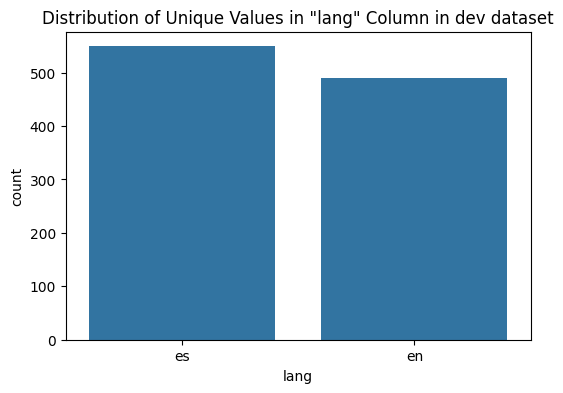

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='lang', data=dev_df)
plt.title('Distribution of Unique Values in "lang" Column in dev dataset')
plt.show()